In [4]:
import numpy as np 
import pandas as pd
import os
train_path = 'C:/Users/preet/Downloads/Project 5502/disease-detection-backend/archive/data/train'
validation_path = 'C:/Users/preet/Downloads/Project 5502/disease-detection-backend/archive/data/validation'

In [5]:
train_folders = [f for f in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, f))]
print("Folders in the training dataset path:", train_folders)

validation_folders = [f for f in os.listdir(validation_path) if os.path.isdir(os.path.join(validation_path, f))]
print("Folders in the validation dataset path:", validation_folders)

Folders in the training dataset path: ['Acral_Lentiginous_Melanoma', 'blue_finger', 'clubbing', 'Healthy_Nail', 'Onychogryphosis', 'pitting']
Folders in the validation dataset path: ['Acral_Lentiginous_Melanoma', 'blue_finger', 'clubbing', 'Healthy_Nail', 'Onychogryphosis', 'pitting']


In [8]:
folders = train_folders+validation_folders 

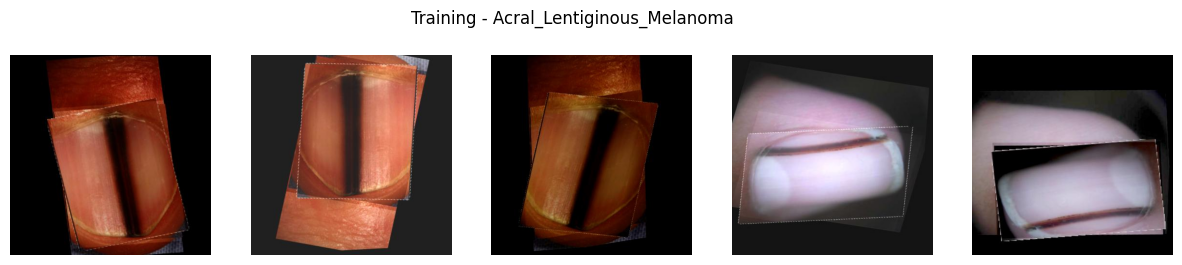

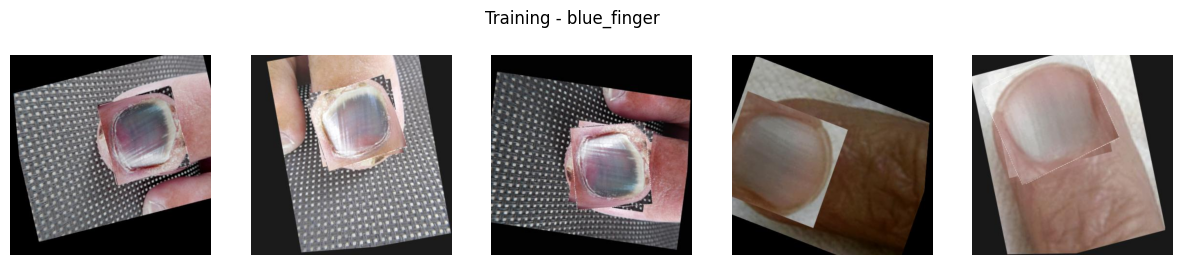

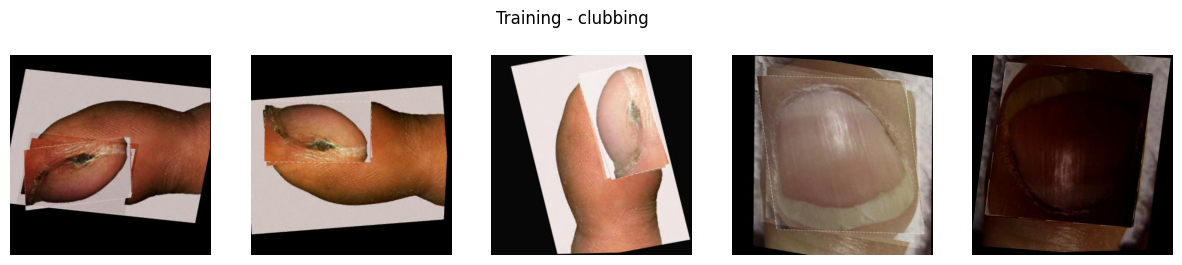

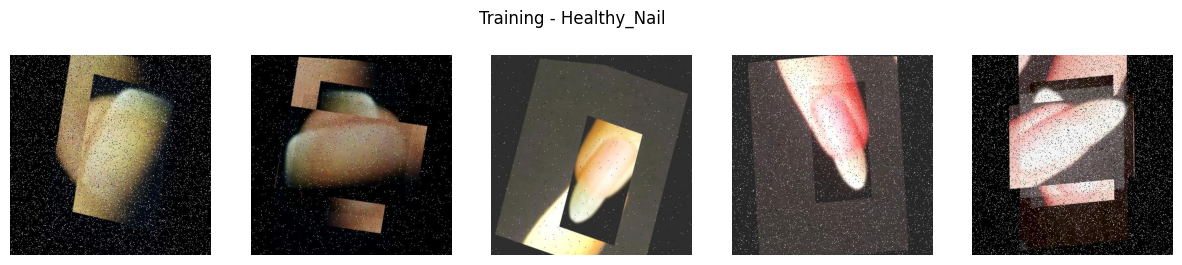

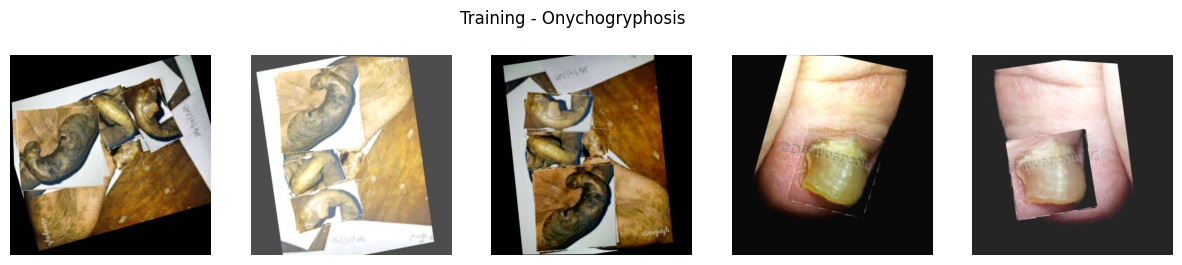

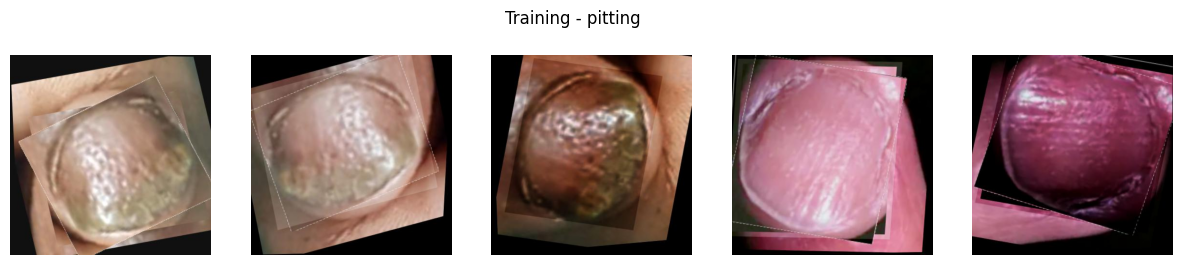

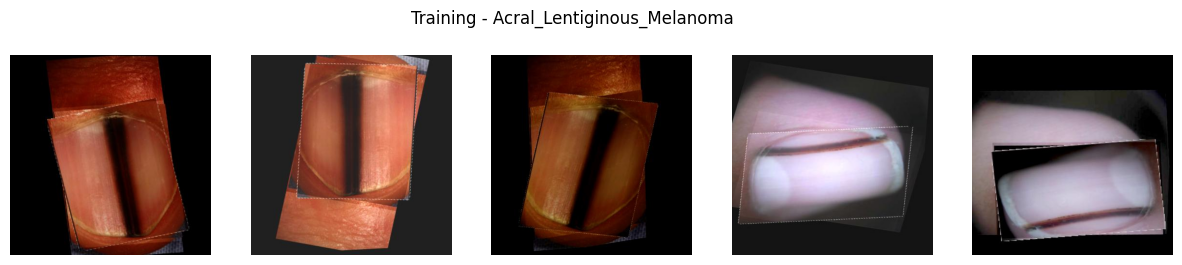

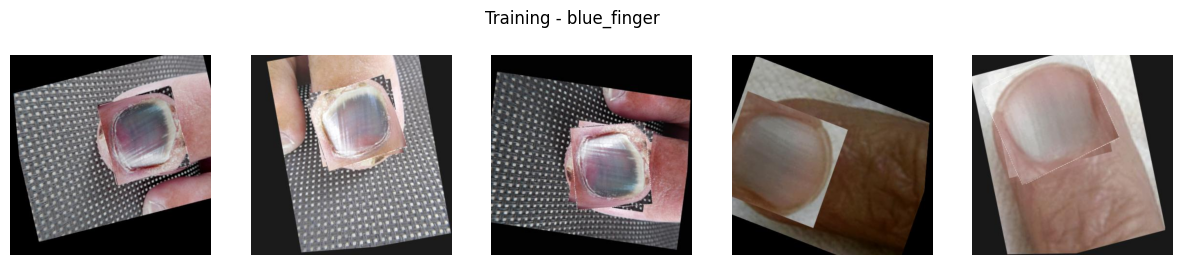

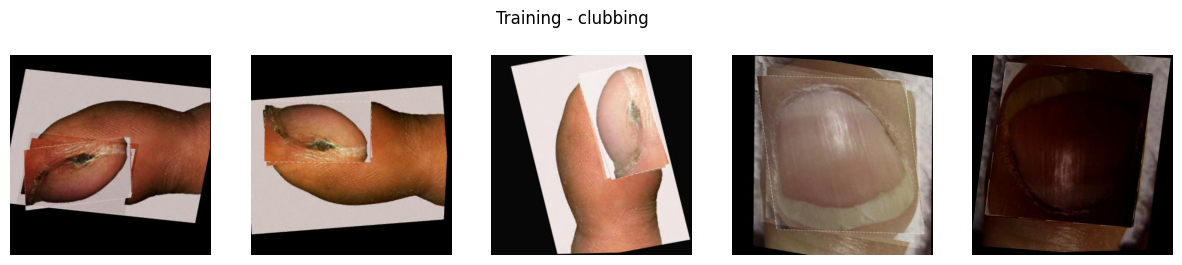

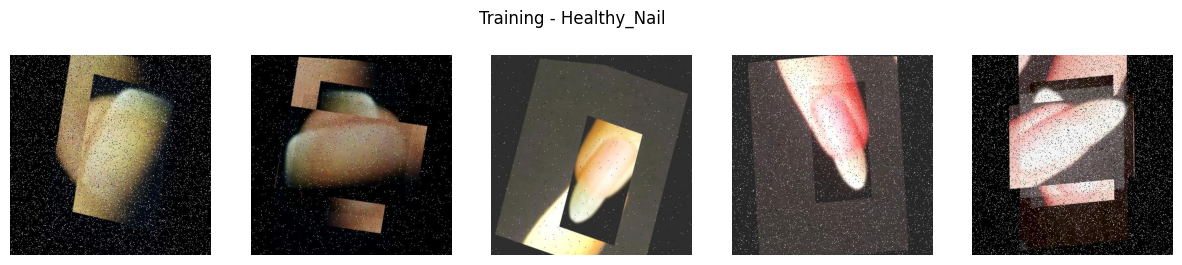

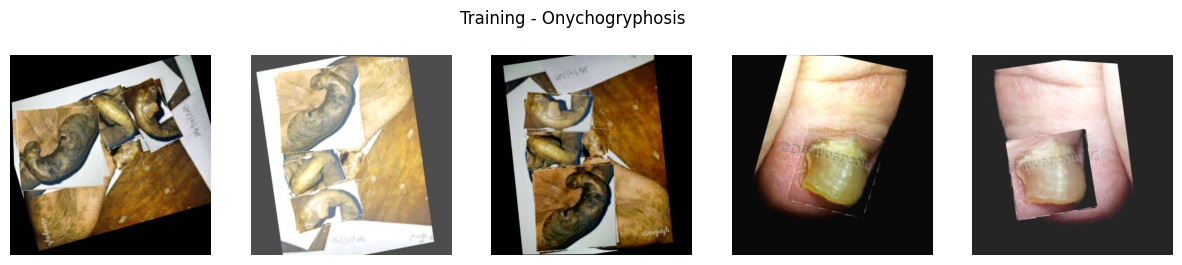

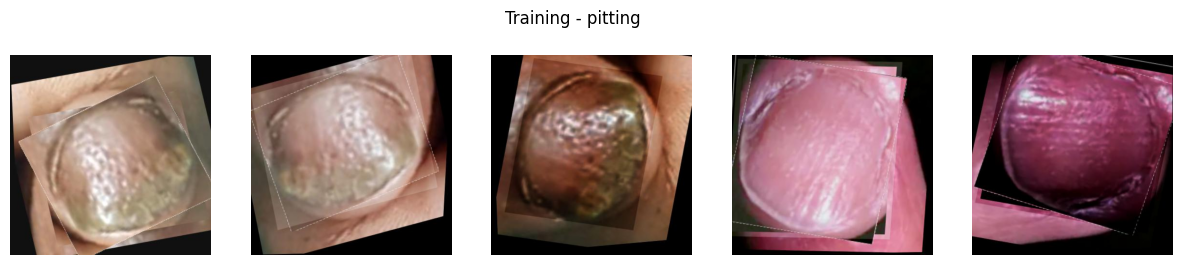

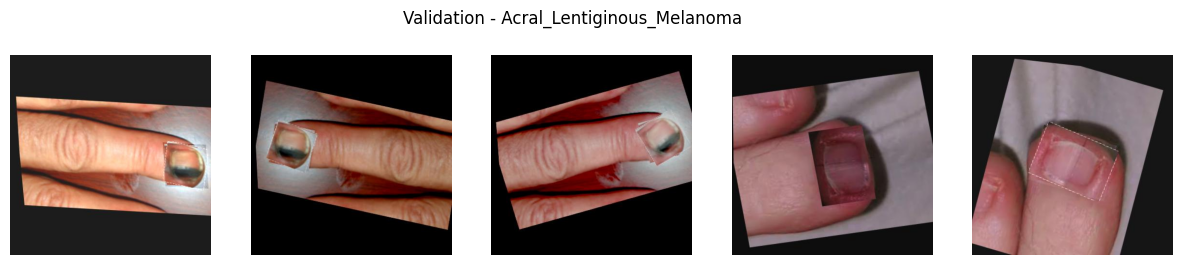

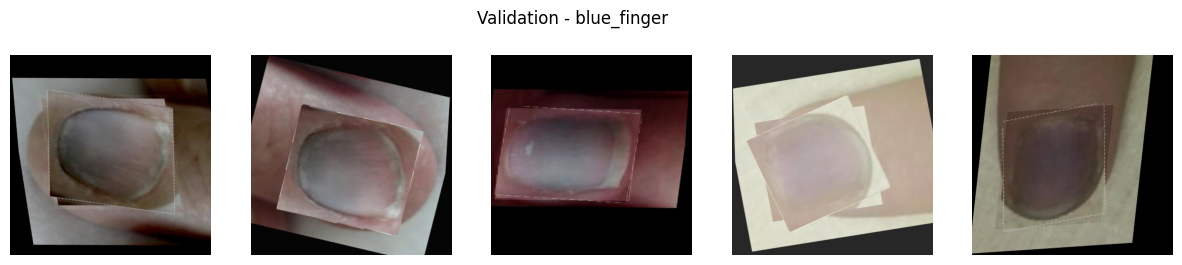

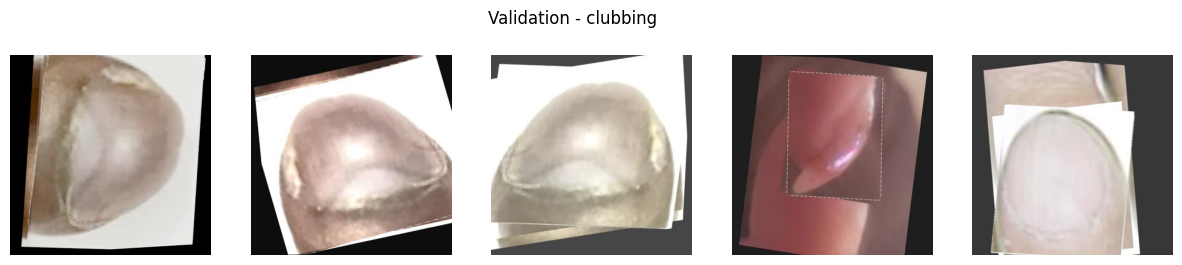

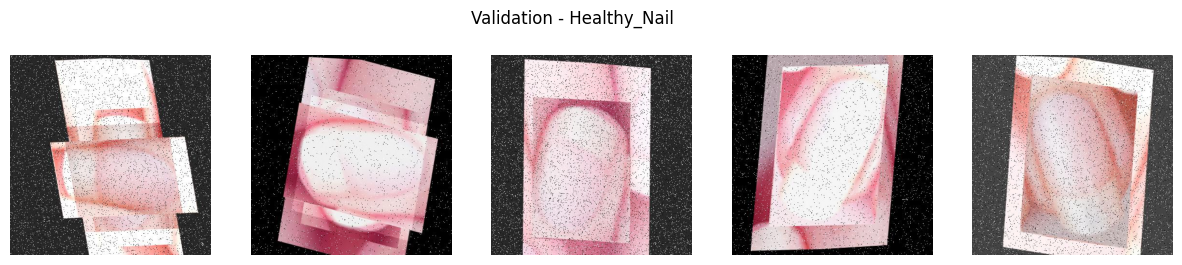

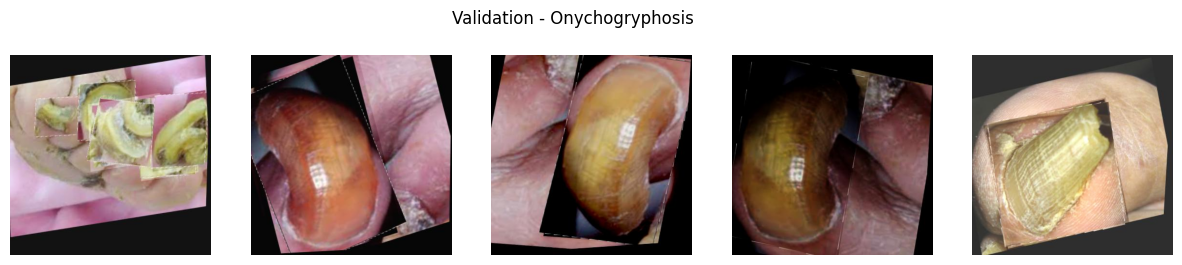

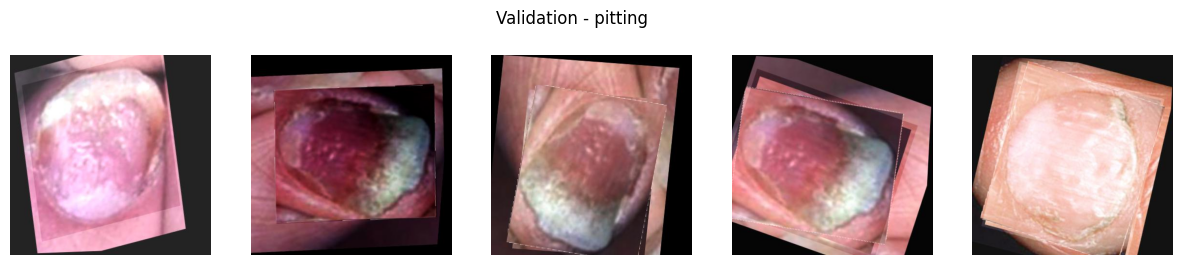

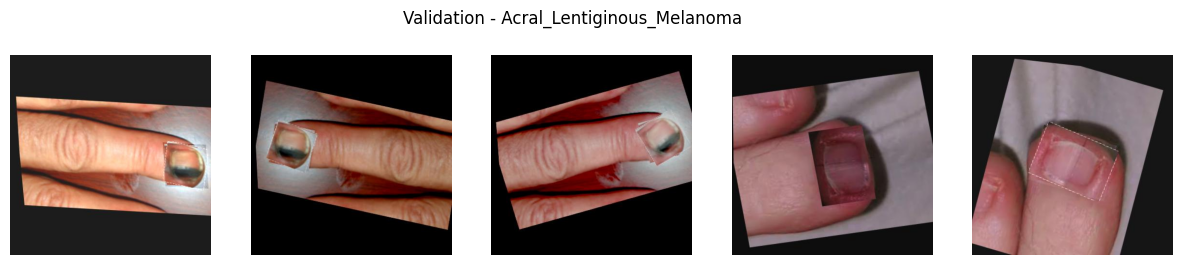

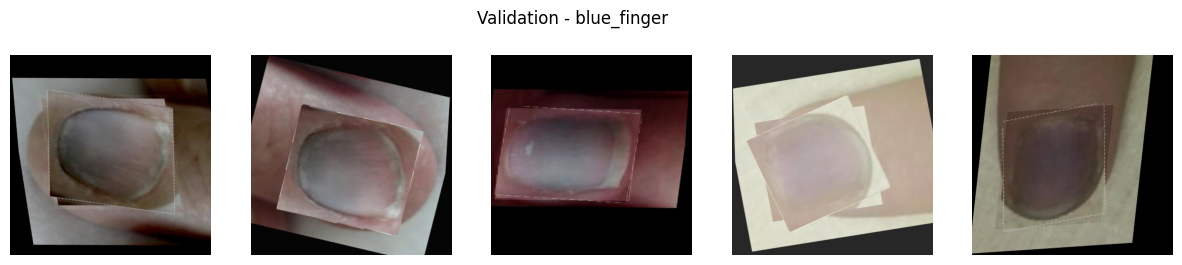

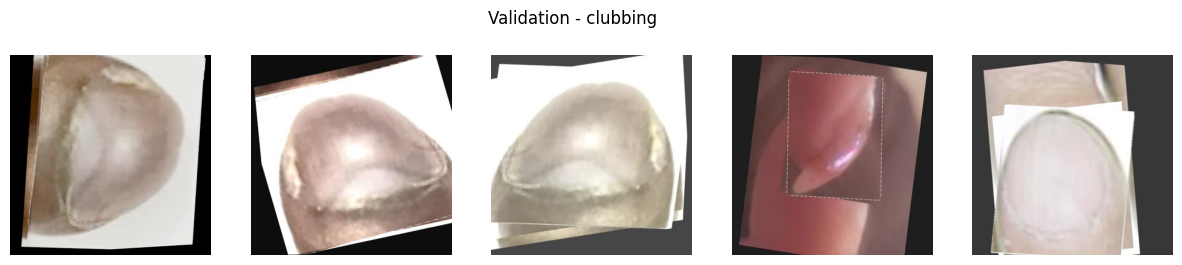

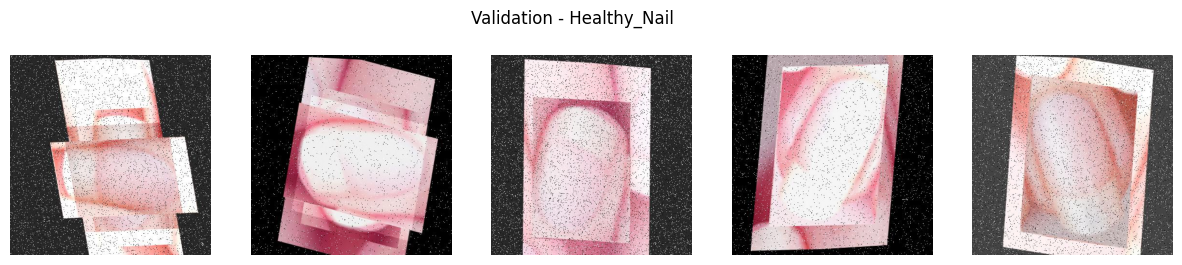

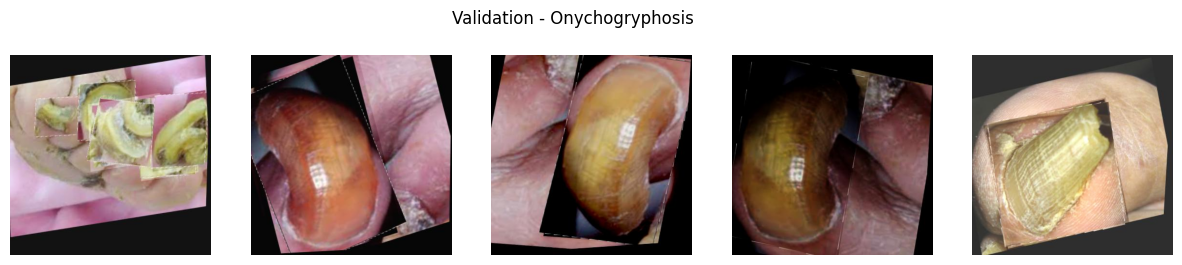

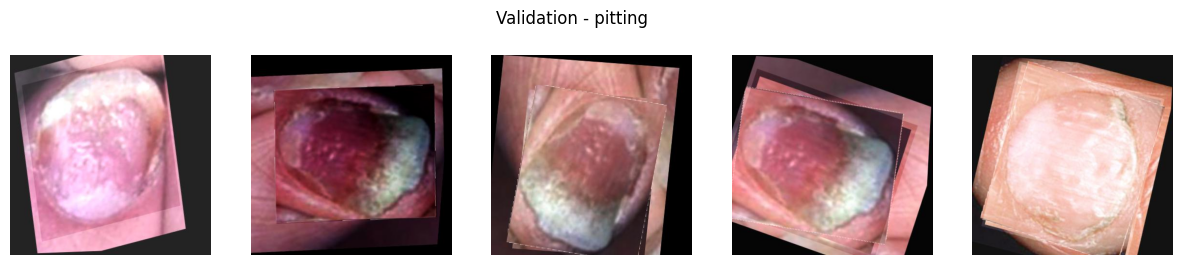

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
def display_images_from_folder(folder_path, title):
    """Display up to 5 images from a specified folder."""
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    image_files = image_files[:5]  

    plt.figure(figsize=(15, 3)) 
    for i, image_file in enumerate(image_files):
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()
for folder in folders:
    folder_path = os.path.join(train_path, folder)
    display_images_from_folder(folder_path, f'Training - {folder}')

for folder in folders:
    folder_path = os.path.join(validation_path, folder)
    display_images_from_folder(folder_path, f'Validation - {folder}')

In [10]:
def preprocess_image(image_path, size=(128, 128)):
    """Load, resize, and normalize an image."""
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size)
    img = img / 255.0  
    return img

def save_image(image, save_path):
    """Save a preprocessed image."""
    image = (image * 255).astype(np.uint8)  
    img_pil = Image.fromarray(image)
    img_pil.save(save_path)

def preprocess_and_save_images(folder_path, save_dir, size=(128, 128)):
    """Preprocess and save images from a folder."""
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            preprocessed_img = preprocess_image(img_path, size)
            save_path = os.path.join(save_dir, filename)
            save_image(preprocessed_img.numpy(), save_path)
preprocess_and_save_images(train_path, train_path)
preprocess_and_save_images(validation_path, validation_path)


In [21]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/376.0 MB 10.5 MB/s eta 0:00:36
    --------------------------------------- 5.2/376.0 MB 15.2 MB/s eta 0:00:25
   - -------------------------------------- 9.4/376.0 MB 17.3 MB/s eta 0:00:22
   - -------------------------------------- 14.2/376.0 MB 18.5 MB/s eta 0:00:20
   -- ------------------------------------- 18.9/376.0 MB 19.5 MB/s eta 0:00:19
   -- ------------------------------------- 23.6/376.0 MB 20.2 MB/s eta 0:00:18
   -- ------------------------------------- 28.0/376.0 MB 20.2 MB/s eta 0:00:18
   --- ------------------------------------ 33.3/376.0 MB 20.9 MB/s eta 0:00:17
   --- ------------------------------------ 37.5/376.0 MB 20.9 MB/s eta 0:00:17
   ---- ----------------------------------- 42.2/376.0 MB 21.3 MB/s eta 0:00:16
   ----- ---------------------------------- 47.2/376.0 MB 21.4 MB/s eta 0:00:16
   ----- ---------------------------------- 52.4/376

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
def create_image_dataset(directory, img_size=(128, 128), batch_size=32):
    """Create a TensorFlow dataset from a directory of images."""
    datagen = ImageDataGenerator(rescale=1.0/255) 
    
    dataset = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',  
        shuffle=True
    )
    
    return dataset

train_dataset = create_image_dataset(train_path)
val_dataset = create_image_dataset(validation_path)

Found 3744 images belonging to 6 classes.
Found 91 images belonging to 6 classes.


In [18]:
def create_model(input_shape, num_classes):
    """Create a CNN model for image classification."""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model
input_shape = (128, 128, 3)  
num_classes = len(train_dataset.class_indices)
model = create_model(input_shape, num_classes)
model.save("C:/Users/preet/Downloads/Project 5502/disease-detection-backend/model.h5")


In [13]:
if tf.config.list_physical_devices('GPU'):
    print("GPU is available and will be used.")
else:
    print("No GPU found, using CPU.")

No GPU found, using CPU.


In [14]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,  
    verbose=1
)

Epoch 1/10
117/117 [==============================] - 78s 662ms/step - loss: 1.6129 - accuracy: 0.2732 - val_loss: 1.2579 - val_accuracy: 0.4286
Epoch 2/10
117/117 [==============================] - 47s 401ms/step - loss: 1.4178 - accuracy: 0.3854 - val_loss: 1.2183 - val_accuracy: 0.4725
Epoch 3/10
117/117 [==============================] - 42s 362ms/step - loss: 1.2897 - accuracy: 0.4749 - val_loss: 1.2055 - val_accuracy: 0.5055
Epoch 4/10
117/117 [==============================] - 40s 346ms/step - loss: 1.2194 - accuracy: 0.4984 - val_loss: 1.0315 - val_accuracy: 0.6044
Epoch 5/10
117/117 [==============================] - 40s 343ms/step - loss: 1.1326 - accuracy: 0.5441 - val_loss: 1.1067 - val_accuracy: 0.5714
Epoch 6/10
117/117 [==============================] - 40s 341ms/step - loss: 1.0716 - accuracy: 0.5716 - val_loss: 0.9575 - val_accuracy: 0.6264
Epoch 7/10
117/117 [==============================] - 40s 344ms/step - loss: 0.9969 - accuracy: 0.5980 - val_loss: 1.0219 - val_ac

In [19]:
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

3/3 [==============================] - 0s 76ms/step - loss: 1.7948 - accuracy: 0.0769
Validation Loss: 1.7948462963104248
Validation Accuracy: 0.07692307978868484


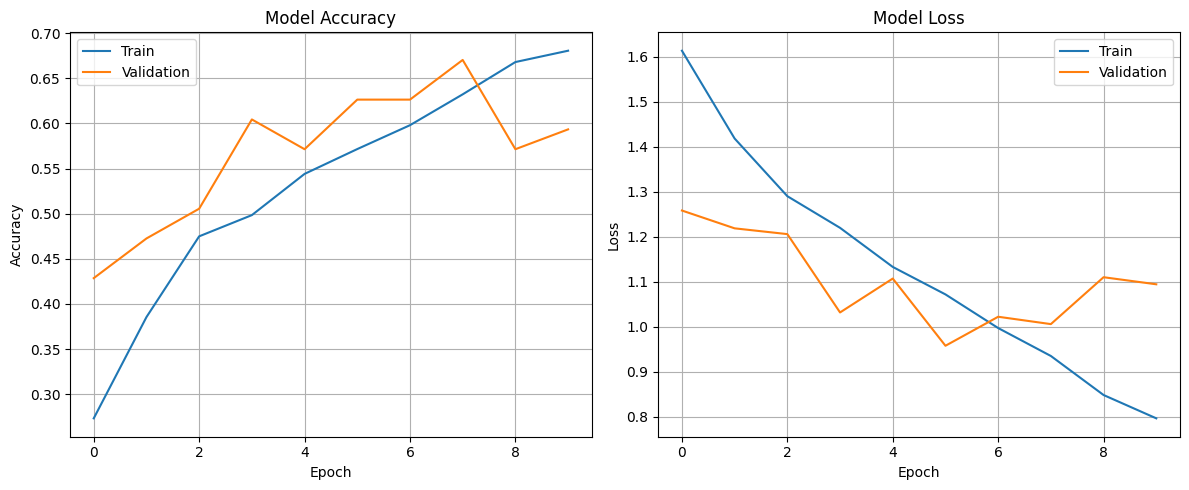

In [21]:
def plot_history(history):
    """Plot the training history."""
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_history(history)